## **SENTIMENT ANALYSIS** 

In [1]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

#text normalization function
%run ./Text_Normalization_Function.ipynb

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

### **Dataset**



In [9]:
# filter data based on time: we only extract data in recent 3 years
import pandas as pd
from datetime import datetime 
import pytz
df = pd.read_csv ("Reviews.csv")
df=pd.DataFrame(df)
df["Polarity"]=np.where(df["Score"]>3, "positive", "negtive")
time_s=df.loc[:,"Time"]
time_s['datestamp']=time_s.apply(datetime.fromtimestamp)

time_y=pd.DataFrame(time_s["datestamp"])
time_s['year']=time_y.applymap(lambda x:x.date().year)
df['year']=time_s["year"]

C:\Users\xiong\AppData\Local\Temp/ipykernel_41364/3526566498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_s['datestamp']=time_s.apply(datetime.fromtimestamp)


In [10]:
certain_y=2009
review=df.loc[df['year']>certain_y]
review.head

<bound method NDFrame.head of             Id   ProductId          UserId                    ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                         dll pa   
3            4  B000UA0QIQ  A395BORC6FGVXV                           Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5            6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
...        ...         ...             ...                            ...   
568449  568450  B001EO7N10  A28KG5XORO54AY               Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                      R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                  pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH        Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                       srfell17   

        HelpfulnessNumerator  HelpfulnessDeno

In [32]:
reviews=review[['Text','Polarity']]
train_data = reviews.sample(n=1000,replace=False)
rest_reviews = reviews.drop(train_data.index)
test_data = rest_reviews.sample(n=10000,replace=False)# change to 10000

In [33]:

len(reviews)

447702

In [35]:
test_data

10000

Load the food reviews data:

In [36]:
print("Dimensions for test data:", test_data.shape)
print("Dimensions for training data:", train_data.shape,"\n")
print("First 5 rows in test dataset: \n", test_data.head(),"\n")
print("First 5 rows in  training dataset: \n", train_data.head())

Dimensions for test data: (10000, 2)
Dimensions for training data: (1000, 2) 

First 5 rows in test dataset: 
                                                      Text  Polarity
110492  My husband loves these. They are easy to make ...  positive
367763  This is by far the best coconut oil ever.....i...  positive
176564  My toddler loves this stuff!  It's a great way...  positive
179626  These are not soft shortbread cookies but Krun...  positive
457517  I fell in love with Glutino stick pretzels whe...  positive 

First 5 rows in  training dataset: 
                                                      Text  Polarity
166004  No calories, and they taste pretty good.  What...  positive
249383  I ordered these cookies because they looked & ...  positive
79048   Just now poured up some great wine. This type ...  positive
337884  This is all I feed my dogs because of the qual...  positive
523637  I prefer tea that is not steeped too long. Thi...  positive


In [37]:
test_reviews = np.array(test_data['Text'])
test_polarity = np.array(test_data['Polarity'])

train_reviews = np.array(train_data['Text'])
train_polarity = np.array(train_data['Polarity'])

Normalize the text for reviews and name the normalized corpora of review texts **normalized_test_reviews** and **normalized_train_reviews**:

In [38]:
normalized_test_reviews = normalize_corpus(test_reviews)
normalized_train_reviews = normalize_corpus(train_reviews)

## **Lexicon-Based Sentiment Analysis (Unsupervised Machine Learning)**



In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
text_1a = 'I like this brand a lot'
text_1b = 'I love the function of it'
text_2a = 'Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'
text_2b = 'I hate the plot of this product :('

In [42]:
print(text_1a, "\nScores:", analyzer.polarity_scores(text_1a),"\n")
print(text_1b, "\nScores:", analyzer.polarity_scores(text_1b),"\n")
print(text_2a, "\nScores:", analyzer.polarity_scores(text_2a),"\n")
print(text_2b, "\nScores:", analyzer.polarity_scores(text_2b),"\n")

I like this brand a lot 
Scores: {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612} 

I love the function of it 
Scores: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369} 

Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". 
Scores: {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5664} 

I hate the plot of this product :( 
Scores: {'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765} 




### **VADER Lexicon-Based Sentiment Analysis of Food Reviews**


In [43]:
sample_docs = [100, 700] #indecies for 2 sample documnets 

for doc_index in sample_docs:
    print('Review:-')
    print(test_reviews[doc_index])
    print('Actual Labeled Sentiment:', test_polarity[doc_index])
    print()

Review:-
i will definitely have to say this tea works if you want to suppress your appetite. I had this tea in the morning with my breakfast. I noticed that it doesn't seem to mix well with eating. It makes me feel wayy full after eating a normal breakfast. The tea takes about an hour to actually take any effects on me, but it gives me a lot of energy and no appetite! So, i would say eat a smaller meal with this tea, otherwise it will make you sick. Overall, it is a good tea and does what it says!
Actual Labeled Sentiment: positive

Review:-
I have tried every rice milk available and this one is quite easily the best of all. Made from wholegrain, brown rice - it is perfect in  smoothy or bowl of cereal.
Actual Labeled Sentiment: positive



In [121]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [122]:
for doc_index in sample_docs:
    print('\nReview text:\n')
    print(test_reviews[doc_index],"\n")
    print('ACTUAL Polarity (Labeled by Human):', test_polarity[doc_index],"\n")    
    final_sentiment = analyze_sentiment_vader_lexicon(normalized_test_reviews[doc_index],
                                                        threshold=0.1,
                                                        verbose=True)
    print('-'*60)  


Review text:

i will definitely have to say this tea works if you want to suppress your appetite. I had this tea in the morning with my breakfast. I noticed that it doesn't seem to mix well with eating. It makes me feel wayy full after eating a normal breakfast. The tea takes about an hour to actually take any effects on me, but it gives me a lot of energy and no appetite! So, i would say eat a smaller meal with this tea, otherwise it will make you sick. Overall, it is a good tea and does what it says! 

ACTUAL Polarity (Labeled by Human): positive 

VADER Polarity (Binary): positive
VADER Score: 0.7
------------------------------------------------------------

Review text:

I have tried every rice milk available and this one is quite easily the best of all. Made from wholegrain, brown rice - it is perfect in  smoothy or bowl of cereal. 

ACTUAL Polarity (Labeled by Human): positive 

VADER Polarity (Binary): positive
VADER Score: 0.9
--------------------------------------------------

,index,Text,Polarity,vader_sentiment
0,110492,My husband loves these. They are easy to make ...,positive,positive
1,367763,This is by far the best coconut oil ever.....i...,positive,positive
2,176564,My toddler loves this stuff! It's a great way...,positive,positive
3,179626,These are not soft shortbread cookies but Krun...,positive,positive
4,457517,I fell in love with Glutino stick pretzels whe...,positive,positive
...,...,...,...,...
9995,39696,"Of course, my cats deserve only the best so I ...",positive,positive
9996,324018,I've tasted worse things but I would not buy t...,negtive,negative
9997,164105,This tea is the greatest....not only in taste ...,positive,positive
9998,135846,"These Riga sprats are hard to find, but well w...",positive,positive


Let's score now all food reviews in the **test** dataset:

In [165]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()


,VADER Polarity,VADER Score
0,positive,0.9571
1,positive,0.8800
2,positive,0.9059
3,positive,0.7684
4,positive,0.9918


In [166]:
test_data=test_data.reset_index()
test_data['vader_sentiment']=VADER_polarity_test_df['VADER Polarity']


ValueError: cannot insert level_0, already exists

In [47]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_polarity, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.73 



In [49]:
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negtive,895,1387,2282
positive,415,7303,7718
All,1310,8690,10000


Have a look at raw VADER scores assigned to actual positive reviews (we sort the reviews by the VADER score in a decreasing order):

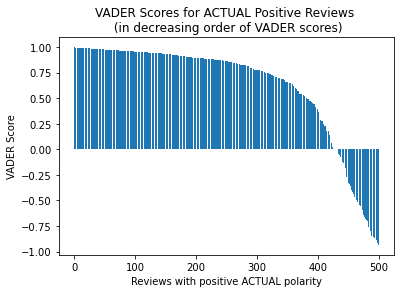

In [50]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

Now, have a look at VADER scores assigned to actual negative reviews (we sort the reviews by the VADER score in a decreasing order):

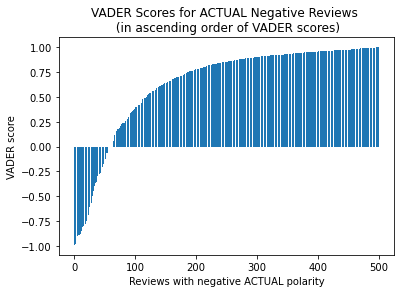

In [51]:
neg_reviews_scored = VADER_polarity_test_df[500:1000]['VADER Score']
plt.bar(range(0, 500), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

In [52]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_polarity, VADER_binary_polarity)
    return(accuracy) 

Let's apply this function to score the food reviews using the threshold value = 0.05:

In [53]:
threshold = 0.05
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold))

Accuracy rate:  0.7331


Now, let's explore the changes in accuracy rate for a range of thresholds from -1 to 1 (that is VADER score's range):

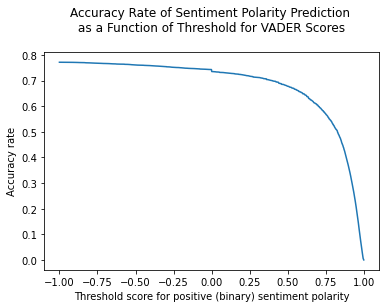

In [54]:
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()